Problem Statement:
You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

Tasks To Be Performed:
1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("C:\\Users\\Alva Melita\\OneDrive\\Desktop\\dataset.csv")

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
statistics = data.describe()
statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
 #Calculate the correlation matrix for all fields
correlation_matrix = data.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

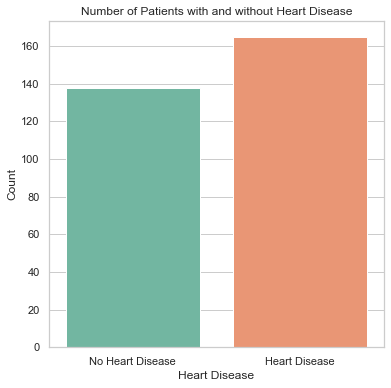

In [12]:
sns.set(style="whitegrid")

# a. Visualize the number of patients with and without heart disease
plt.figure(figsize=(6, 6))
sns.countplot(x="target", data=data, palette="Set2")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"])
plt.title("Number of Patients with and without Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()




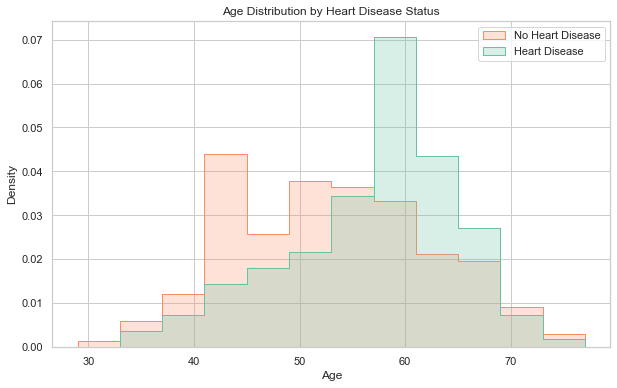

In [13]:
# b. Visualize age distribution for patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="age", hue="target", element="step", stat="density", common_norm=False, palette="Set2")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

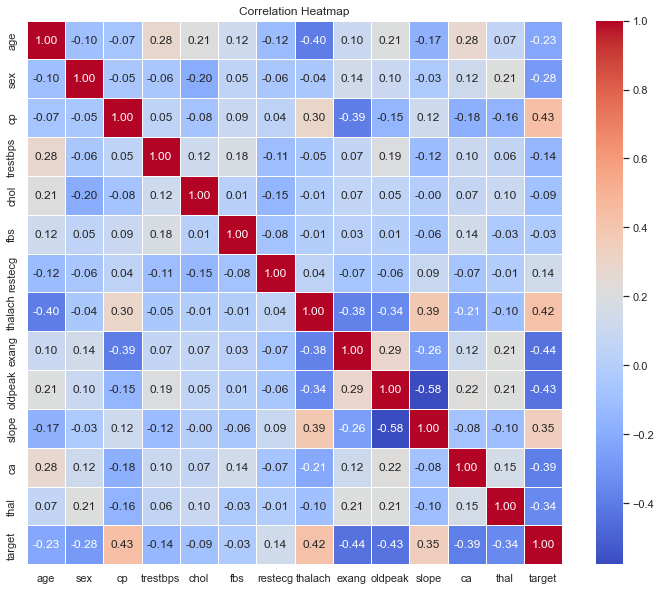

In [14]:
# c. Visualize correlation between all features using a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


3. Logistic Regression:
a. Build a simple logistic regression model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [16]:
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)






Confusion Matrix:
 [[32  9]
 [ 8 42]]
Accuracy Score: 0.8131868131868132


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Decision Tree:
a. Build a decision tree model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the decision tree using the Graphviz package

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz




# Split the dataset into features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)





Confusion Matrix:
 [[32  9]
 [15 35]]
Accuracy Score: 0.7362637362637363


In [ ]:
# Visualize the decision tree using Graphviz
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,
                           class_names=["No Heart Disease", "Heart Disease"],
                           filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("heart_disease_tree", format="png", cleanup=True)



5. Random Forest:
a. Build a Random Forest model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the model using the Graphviz package

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/path/to/graphviz/bin'

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [20]:
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)








Confusion Matrix:
 [[33  8]
 [ 8 42]]
Accuracy Score: 0.8241758241758241


In [ ]:
# Visualize one of the trees using Graphviz
tree = model.estimators_[0]  # Select the first tree in the forest
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,
                           class_names=["No Heart Disease", "Heart Disease"],
                           filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="png", cleanup=True)

6. Select the best model
a. Print the confusion matrix of all classifiers
b. Print the classification report of all classifiers
c. Calculate Recall Precision and F1 score of all the models
d. Visualize confusion matrix using heatmaps
e. Select the best model based on the best accuracies

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
 

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Confusion Matrix:
 [[32  9]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree
Confusion Matrix:
 [[32  9]
 [15 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Random Forest
Confusion Matrix:
 [[33  8]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
   

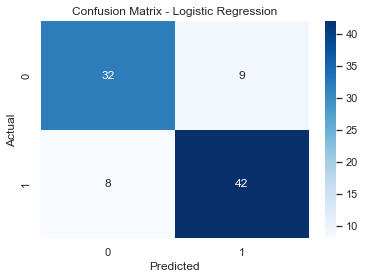

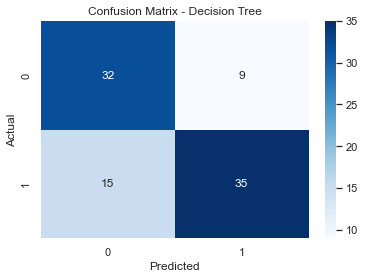

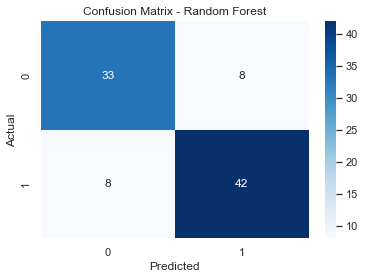

Best Model: Random Forest with Accuracy: 0.8241758241758241


In [15]:
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
logreg_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# List of classifiers and their names
classifiers = [logreg_model, decision_tree_model, random_forest_model]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Initialize dictionaries to store evaluation metrics
conf_matrices = {}
classification_reports = {}
recall_scores = {}
precision_scores = {}
f1_scores = {}

# Evaluate each classifier
for model, name in zip(classifiers, classifier_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    classification_reports[name] = classification_report(y_test, y_pred)
    
    # Calculate recall, precision, and F1 score
    recall_scores[name] = recall_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)

# Print confusion matrices and classification reports
for name in classifier_names:
    print(name)
    print("Confusion Matrix:\n", conf_matrices[name])
    print("Classification Report:\n", classification_reports[name])

# Calculate and print recall, precision, and F1 scores
for name in classifier_names:
    print(name)
    print("Recall:", recall_scores[name])
    print("Precision:", precision_scores[name])
    print("F1 Score:", f1_scores[name])







In [ ]:
# Visualize confusion matrices using heatmaps
for name in classifier_names:
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrices[name], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()